In [4]:
!pip install klib --quiet


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import klib
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib

In [6]:
sns.set()

In [7]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

In [9]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


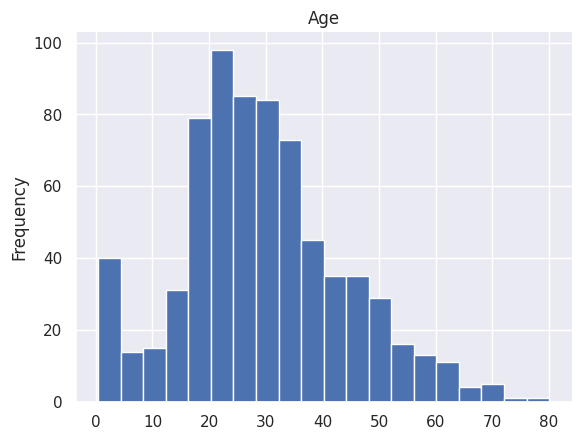

In [12]:
# @title Age

from matplotlib import pyplot as plt
titanic['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Pclass', ylabel='Survived'>

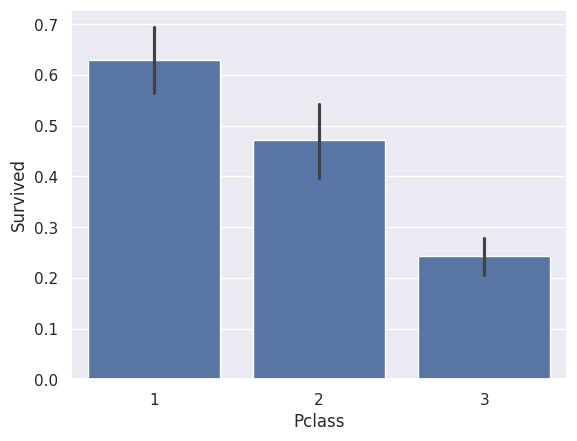

In [11]:
# @title Survival Rate by Class

sns.barplot(x="Pclass", y="Survived", data=titanic)

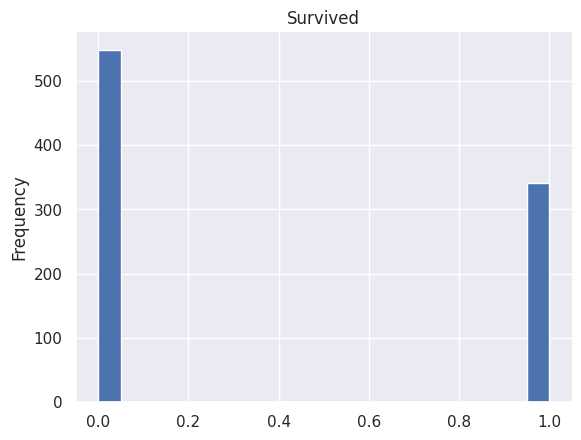

In [10]:
# @title Survived

from matplotlib import pyplot as plt
titanic['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
def data_split(df):
    train_set, test_set = train_test_split(df, test_size=0.33, random_state=42)
    return train_set, test_set

In [15]:
titanic_train, titanic_test = data_split(titanic)
titanic_train = titanic_train.copy()
titanic_test = titanic_test.copy()

In [16]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 6 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Survived     596 non-null    int64  
 2   Pclass       596 non-null    int64  
 3   Name         596 non-null    object 
 4   Sex          596 non-null    object 
 5   Age          478 non-null    float64
 6   SibSp        596 non-null    int64  
 7   Parch        596 non-null    int64  
 8   Ticket       596 non-null    object 
 9   Fare         596 non-null    float64
 10  Cabin        134 non-null    object 
 11  Embarked     595 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 60.5+ KB


In [17]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            118
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          462
Embarked         1
dtype: int64

In [18]:
titanic_train.shape


(596, 12)

In [19]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

GridSpec(6, 6)

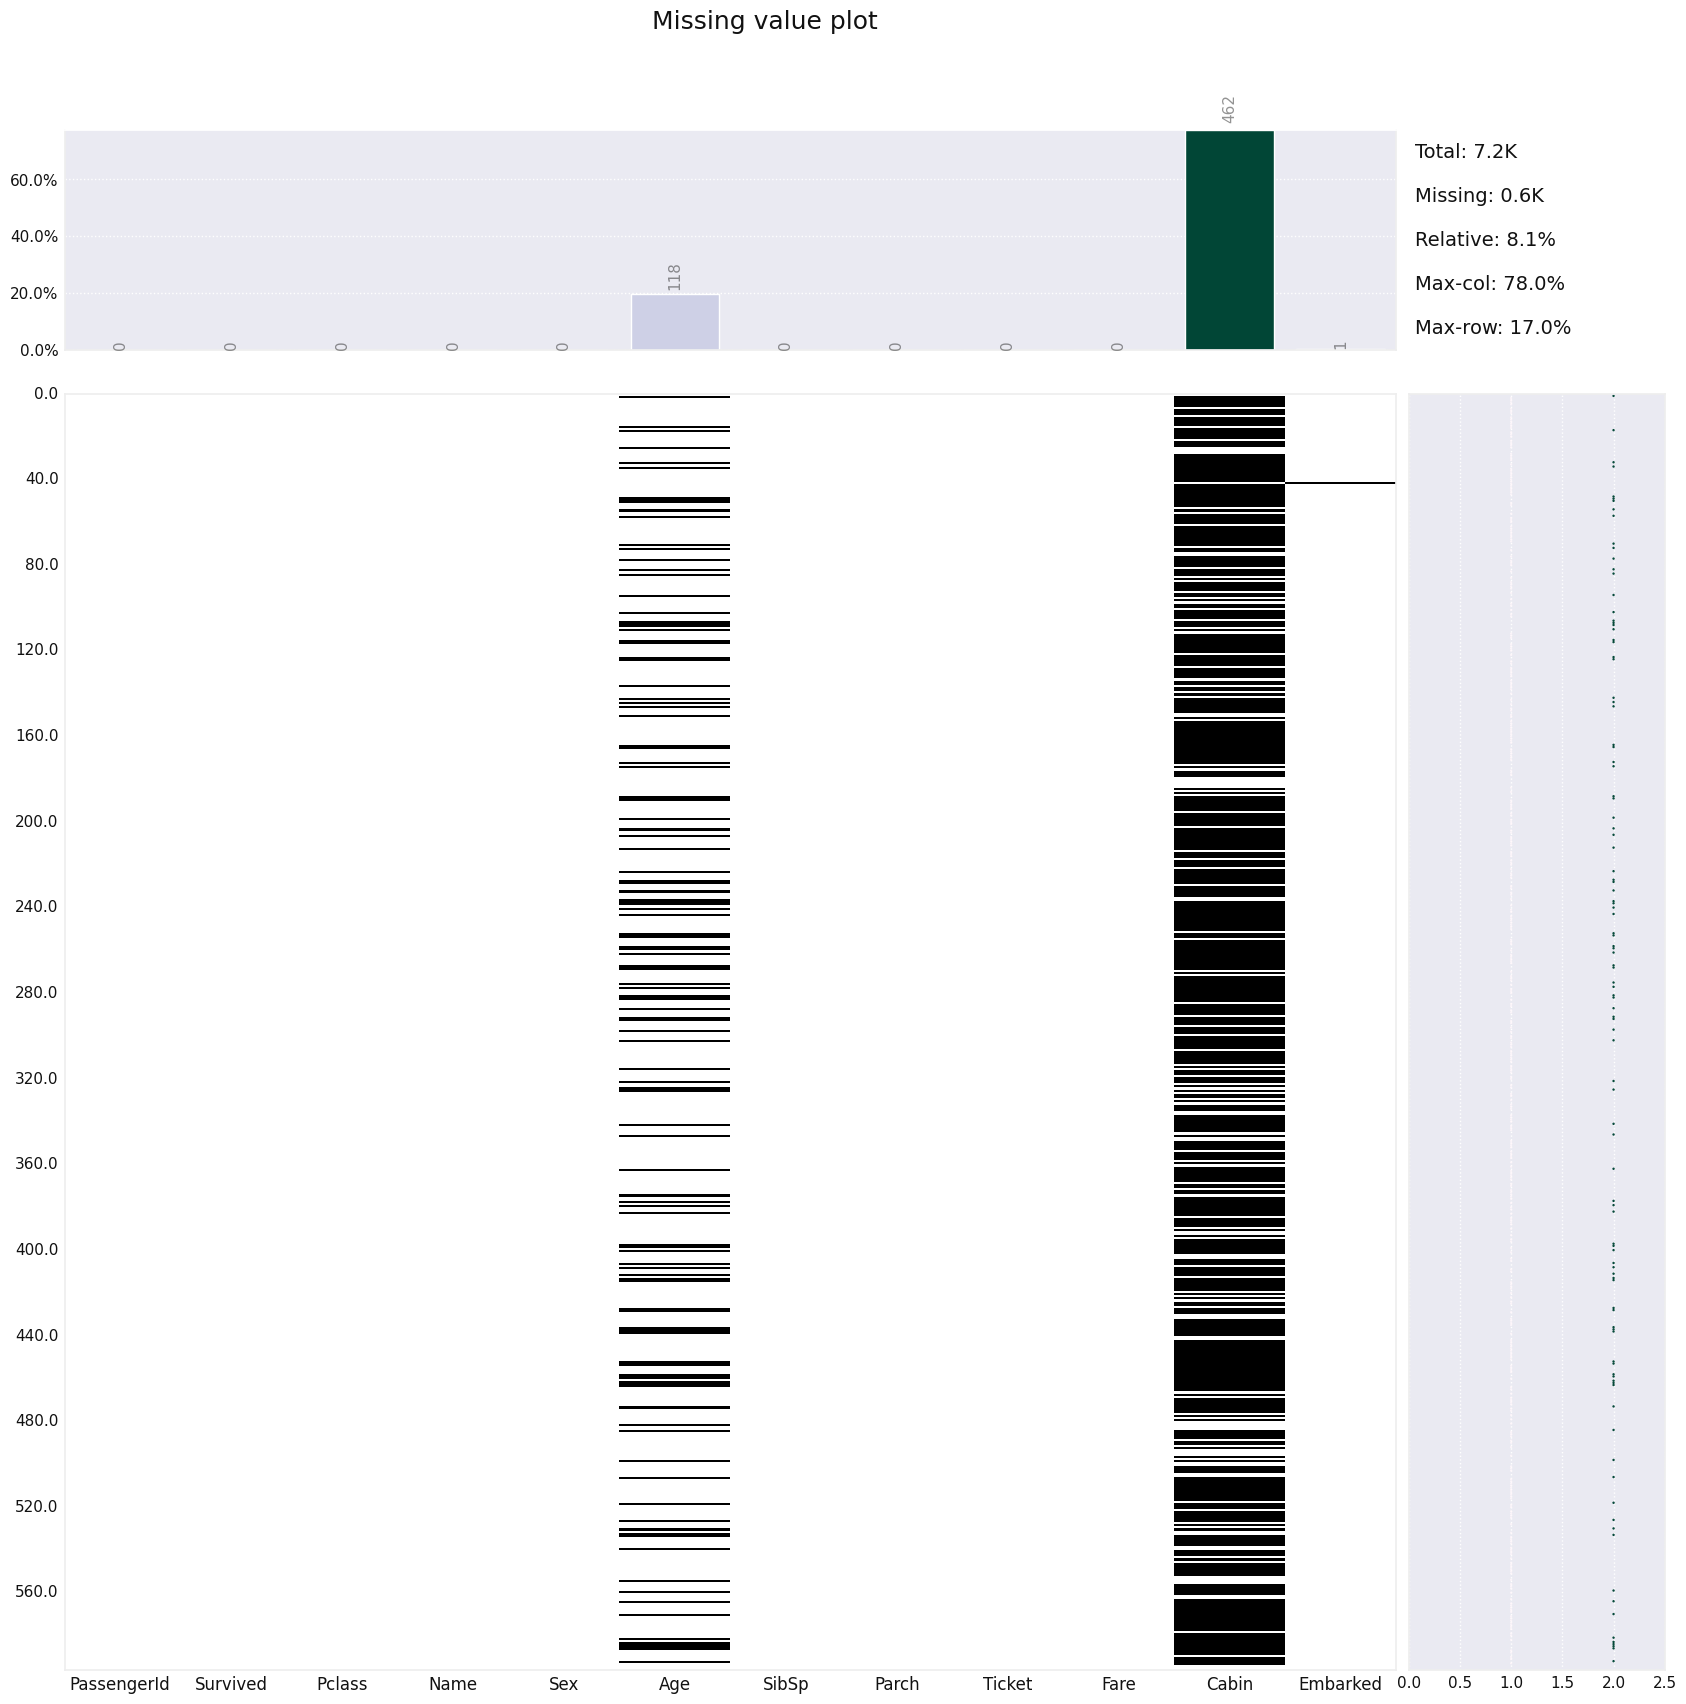

In [20]:
klib.missingval_plot(titanic_train)

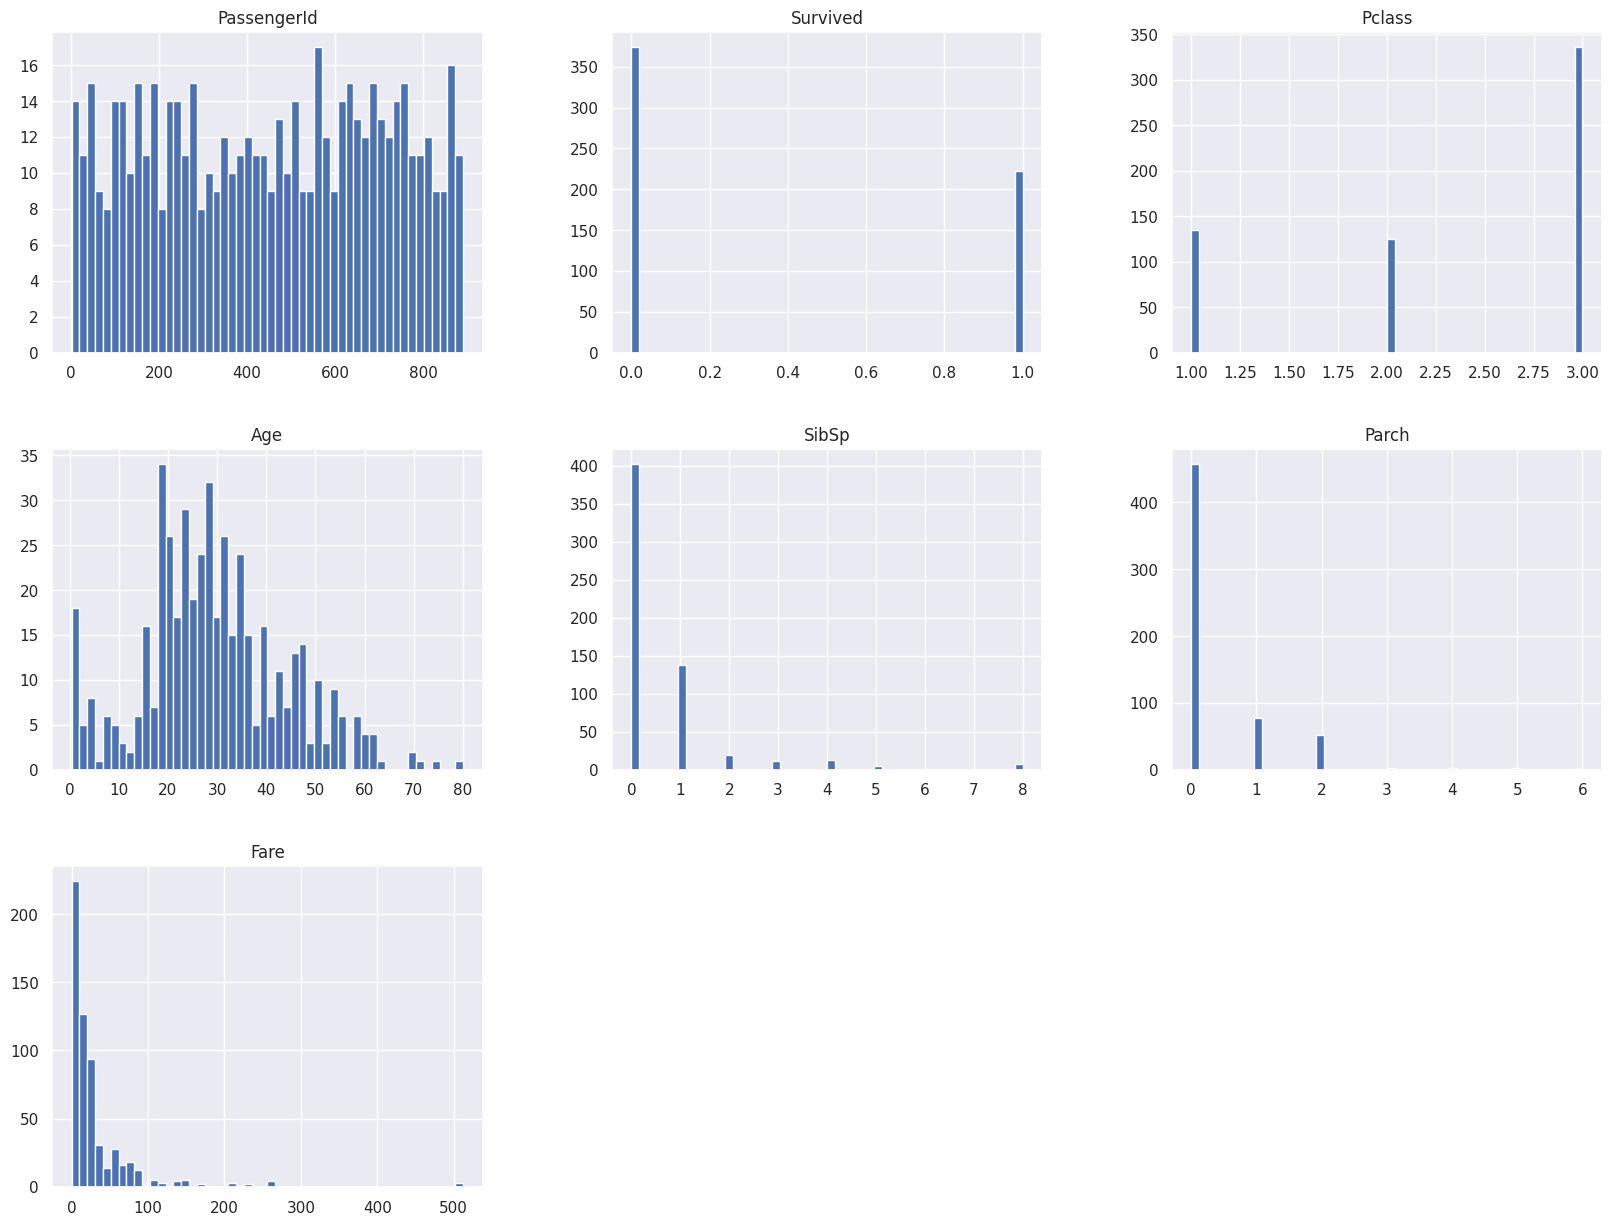

In [21]:
titanic_train.hist(bins=50, figsize=(20,15))
plt.show()

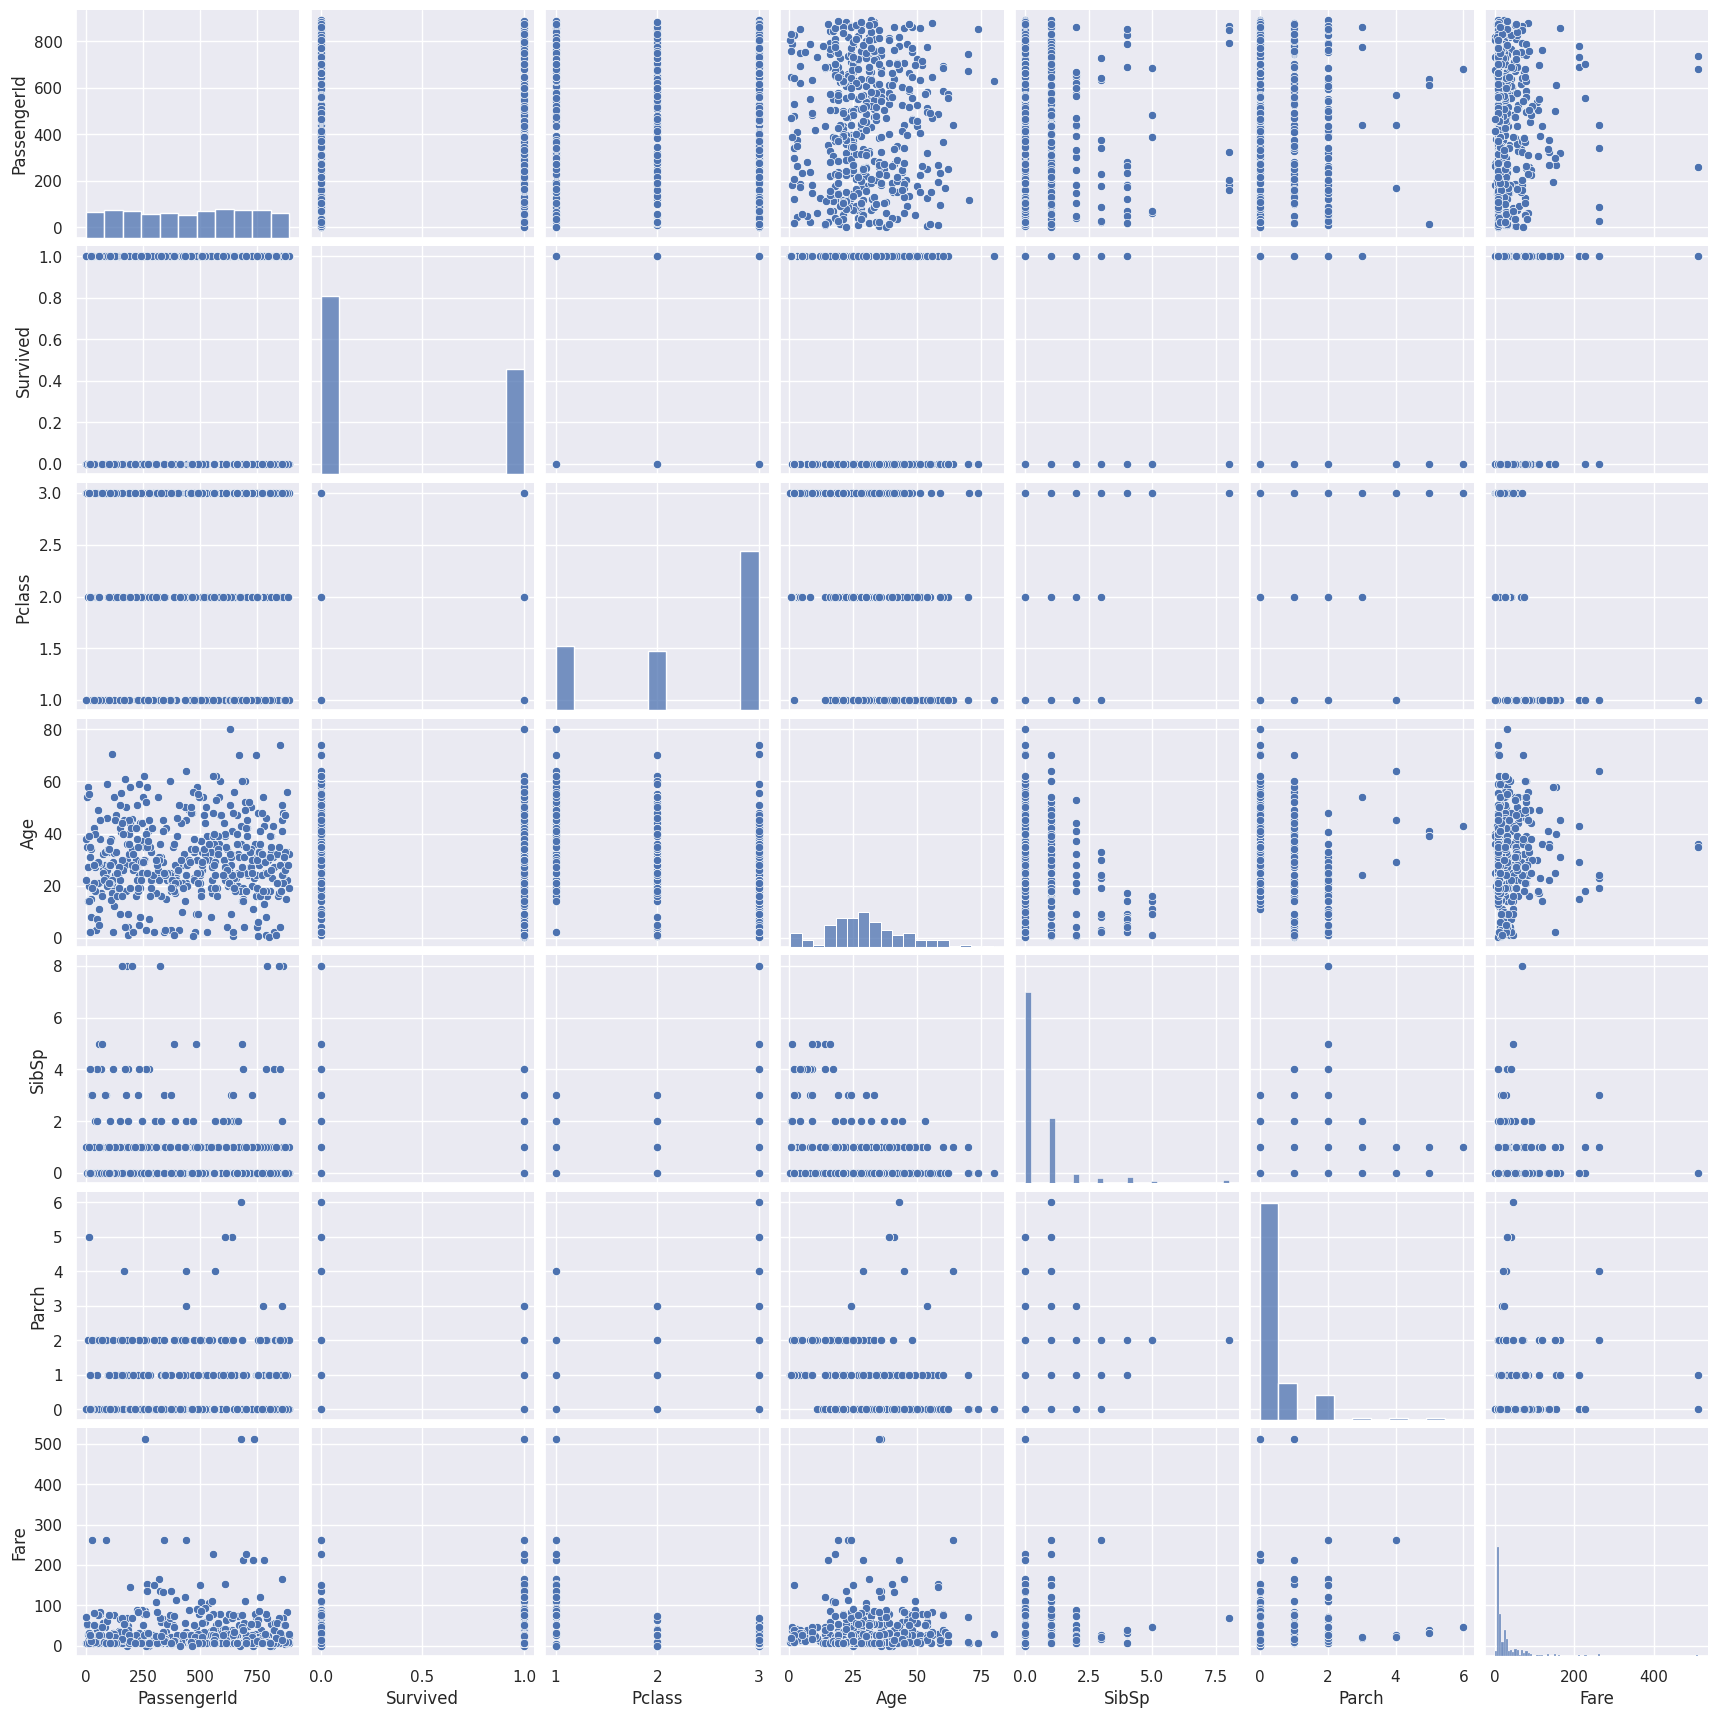

In [22]:
sns.pairplot(titanic_train)

In [23]:
total_males = titanic_train.groupby('Sex').count()['Survived']['male']
total_females = titanic_train.groupby('Sex').count()['Survived']['female']

print('Total Number of Males : ', total_males)
print('Total Number of Females : ', total_females)

total_males_survived = titanic_train.groupby('Sex').sum()['Survived']['male']
total_females_survived = titanic_train.groupby('Sex').sum()['Survived']['female']

print('Total Number of Males Survived : ', total_males_survived)
print('Total Number of Females Survived : ', total_females_survived)

percent_of_survived_males = (total_males_survived / total_males) * 100
percent_of_survived_females = (total_females_survived / total_females) * 100

print('Percentage of Survived Males : {:.2f}%'.format(percent_of_survived_males))
print('Percentage of Survived Females : {:.2f}%'.format(percent_of_survived_females))

Total Number of Males :  390
Total Number of Females :  206
Total Number of Males Survived :  73
Total Number of Females Survived :  149
Percentage of Survived Males : 18.72%
Percentage of Survived Females : 72.33%


<ipython-input-23-7ffcd49a8b17>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_males_survived = titanic_train.groupby('Sex').sum()['Survived']['male']
<ipython-input-23-7ffcd49a8b17>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_females_survived = titanic_train.groupby('Sex').sum()['Survived']['female']


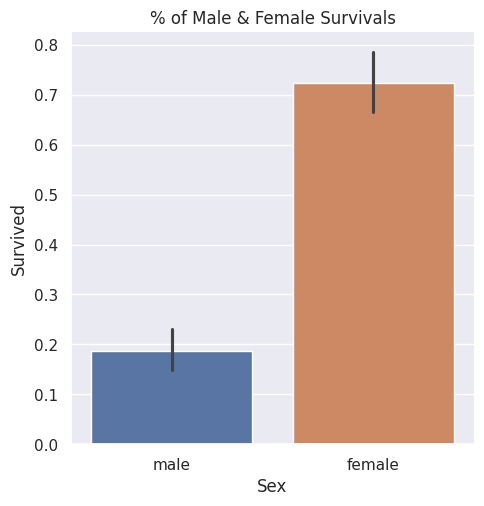

In [24]:
sns.catplot(data=titanic_train, x='Sex', y='Survived', hue='Sex', kind='bar').set(title='% of Male & Female Survivals')
plt.show()

In [25]:
total_class_1_passenger = titanic_train.groupby('Pclass').count()['Survived'][1]
total_class_2_passenger = titanic_train.groupby('Pclass').count()['Survived'][2]
total_class_3_passenger = titanic_train.groupby('Pclass').count()['Survived'][3]

print('Total Number of Class 1 Passenger : ', total_class_1_passenger)
print('Total Number of Class 2 Passenger : ', total_class_2_passenger)
print('Total Number of Class 3 Passenger : ', total_class_3_passenger)

total_class1_survived = titanic_train.groupby('Pclass').sum()['Survived'][1]
total_class2_survived = titanic_train.groupby('Pclass').sum()['Survived'][2]
total_class3_survived = titanic_train.groupby('Pclass').sum()['Survived'][3]

print('Total Number of Class 1 Passenger Survived : ', total_class1_survived)
print('Total Number of Class 2 Passenger Survived : ', total_class2_survived)
print('Total Number of Class 3 Passenger Survived : ', total_class3_survived)

percent_of_class1_survived = (total_class1_survived / total_class_1_passenger) * 100
percent_of_class2_survived = (total_class2_survived / total_class_2_passenger) * 100
percent_of_class3_survived = (total_class3_survived / total_class_3_passenger) * 100

print('Percentage of Class 1 Passenger Survived : {:.2f}%'.format(percent_of_class1_survived))
print('Percentage of Class 2 Passenger Survived : {:.2f}%'.format(percent_of_class2_survived))
print('Percentage of Class 3 Passenger Survived : {:.2f}%'.format(percent_of_class3_survived))

Total Number of Class 1 Passenger :  135
Total Number of Class 2 Passenger :  125
Total Number of Class 3 Passenger :  336
Total Number of Class 1 Passenger Survived :  80
Total Number of Class 2 Passenger Survived :  61
Total Number of Class 3 Passenger Survived :  81
Percentage of Class 1 Passenger Survived : 59.26%
Percentage of Class 2 Passenger Survived : 48.80%
Percentage of Class 3 Passenger Survived : 24.11%


<ipython-input-25-56cc0a783af8>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_class1_survived = titanic_train.groupby('Pclass').sum()['Survived'][1]
<ipython-input-25-56cc0a783af8>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_class2_survived = titanic_train.groupby('Pclass').sum()['Survived'][2]
<ipython-input-25-56cc0a783af8>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_class3_survived = t

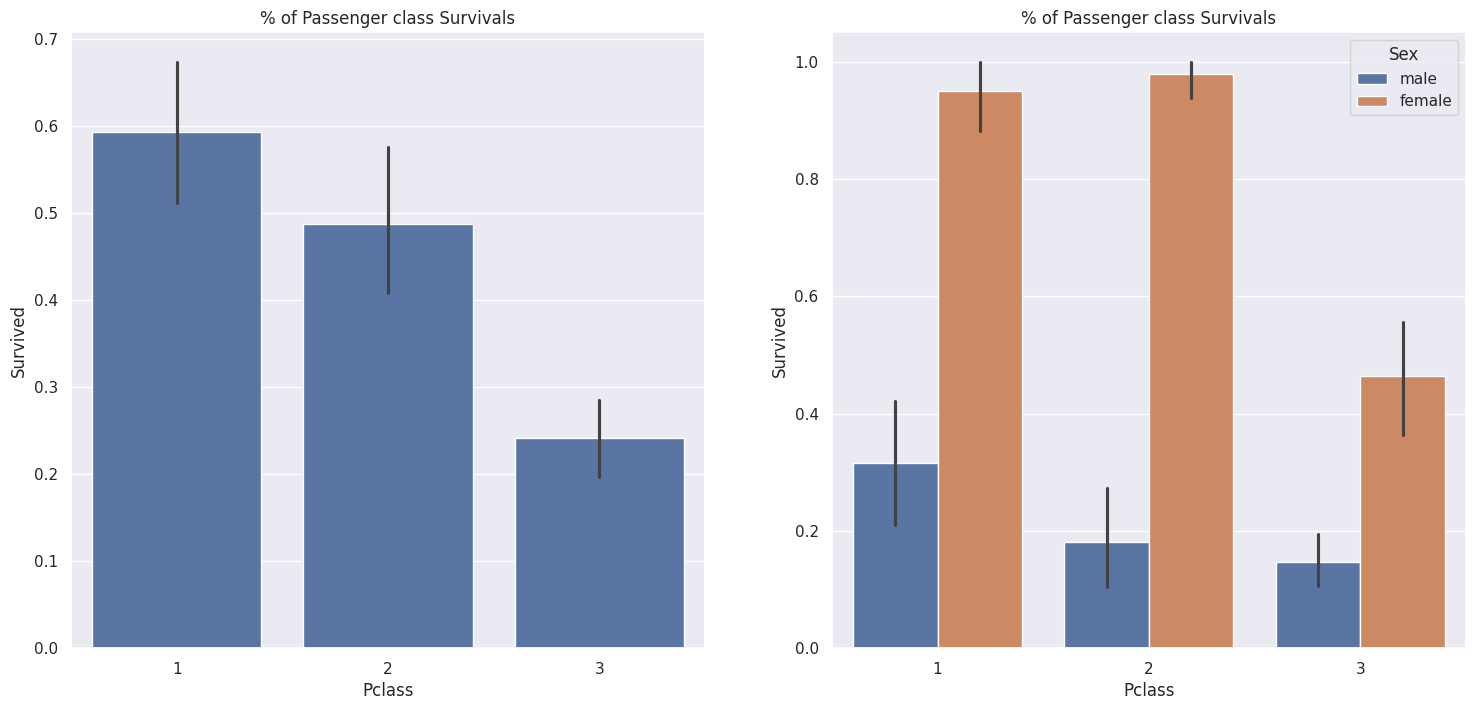

In [26]:
ig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(data=titanic_train, x='Pclass', y='Survived', ax=axes[0]).set(title='% of Passenger class Survivals')
sns.barplot(data=titanic_train, x='Pclass', y='Survived', hue='Sex', ax=axes[1]).set(title='% of Passenger class Survivals')
plt.show()

In [27]:
titanic_train['Age'].dtype

dtype('float64')

In [28]:
titanic_train['age_category'] = pd.cut(titanic_train['Age'], bins=[0, 18, 30, 60, 100, np.inf])
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(30.0, 60.0]"
718,719,0,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q,NaN
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C,"(18.0, 30.0]"
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C,"(18.0, 30.0]"
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,"(18.0, 30.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S,"(18.0, 30.0]"
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,NaN
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S,"(30.0, 60.0]"
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S,"(0.0, 18.0]"


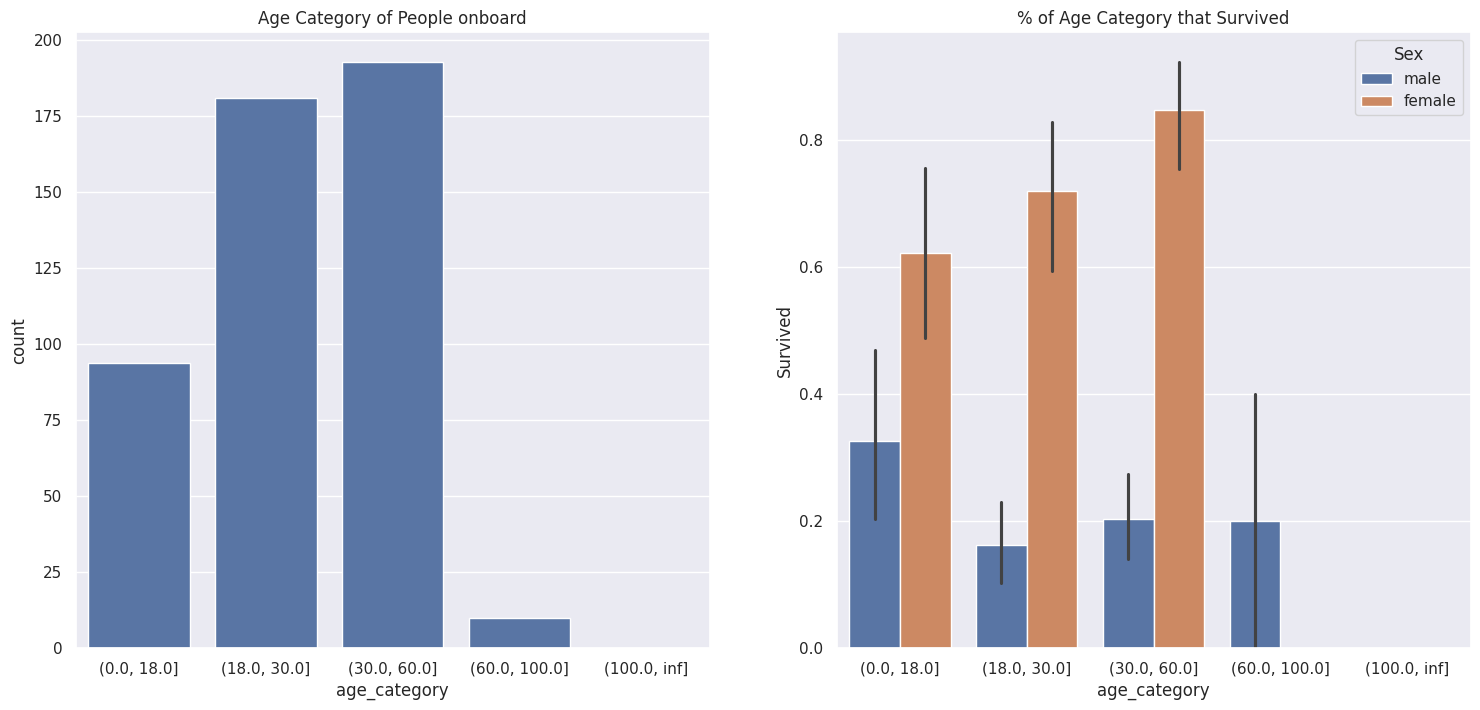

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(x='age_category', data=titanic_train, ax=axes[0]).set(title='Age Category of People onboard')
sns.barplot(x='age_category', y='Survived', hue='Sex', data=titanic_train,ax=axes[1]).set(title='% of Age Category that Survived')

plt.show()

[Text(0.5, 1.0, 'Number of Parent Child that survived')]

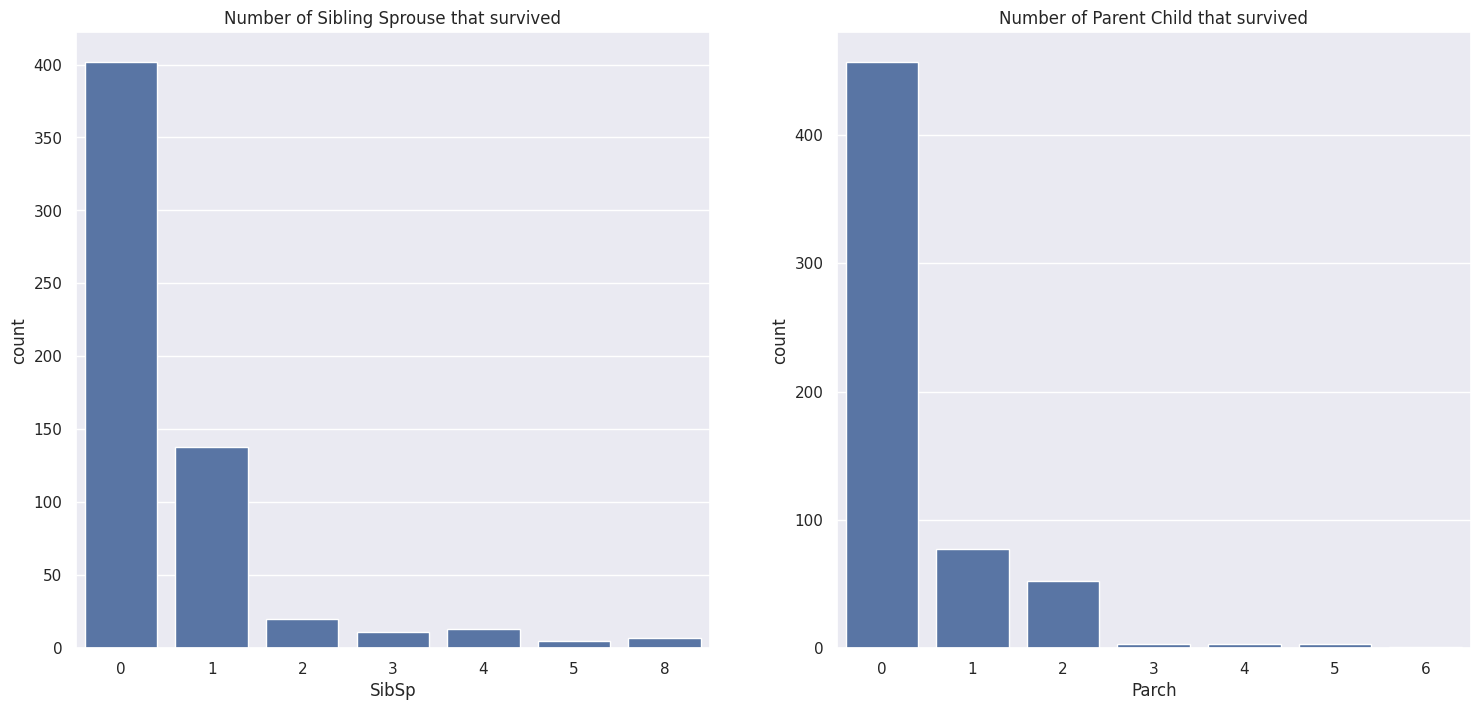

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(x='SibSp', data=titanic_train, ax=axes[0]).set(title='Number of Sibling Sprouse that survived')
sns.countplot(x='Parch', data=titanic_train, ax=axes[1]).set(title='Number of Parent Child that survived')

In [31]:
klib.corr_mat(data=titanic_train)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,0.00,-0.05,0.02,-0.08,0.00,0.02
Survived,0.00,1.00,-0.31,-0.06,-0.05,0.07,0.24
Pclass,-0.05,-0.31,1.00,-0.36,0.10,0.04,-0.52
Age,0.02,-0.06,-0.36,1.00,-0.32,-0.18,0.09
SibSp,-0.08,-0.05,0.10,-0.32,1.00,0.45,0.16
Parch,0.00,0.07,0.04,-0.18,0.45,1.00,0.21
Fare,0.02,0.24,-0.52,0.09,0.16,0.21,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

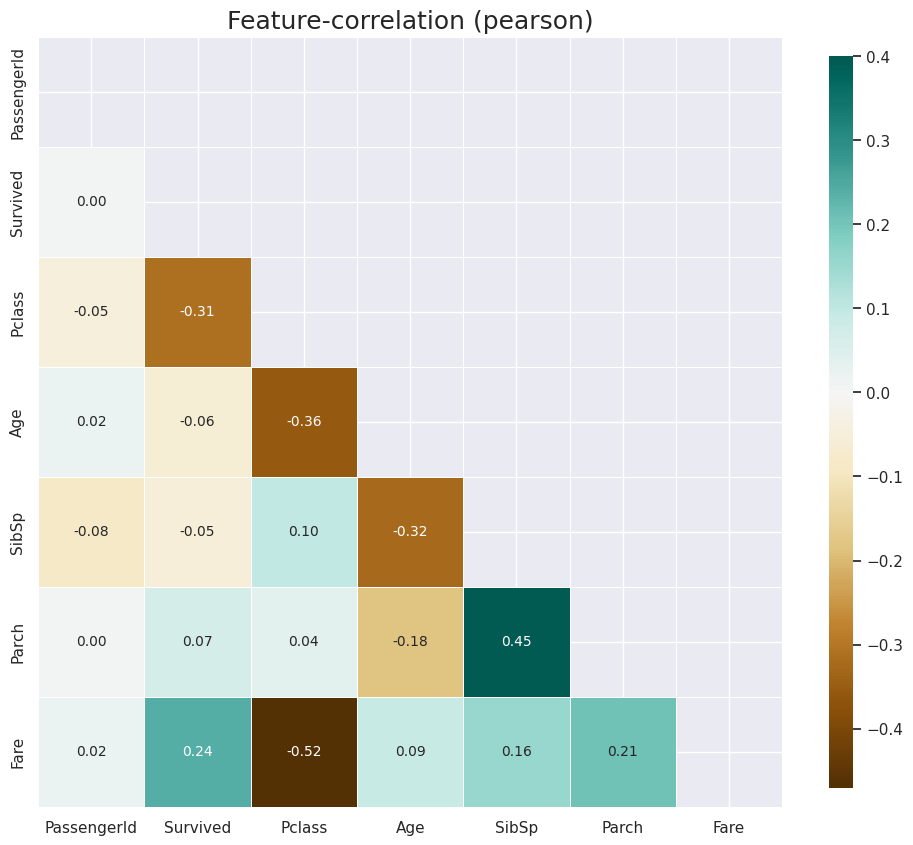

In [32]:
klib.corr_plot(data=titanic_train)

In [33]:
titanic.Pclass.unique()

array([3, 1, 2])

In [34]:
titanic_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(30.0, 60.0]"
718,719,0,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q,NaN
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C,"(18.0, 30.0]"
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C,"(18.0, 30.0]"
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,"(18.0, 30.0]"


In [35]:
titanic_train.dtypes


PassengerId        int64
Survived           int64
Pclass             int64
Name              object
Sex               object
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked          object
age_category    category
dtype: object

In [36]:
titanic.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [37]:
features_name = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target_name =  ['Survived']


In [38]:
X_train = titanic_train[features_name]
y_train = titanic_train[target_name]

In [40]:
X_train[:5]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
6,1,male,54.0,0,0,51.8625,S
718,3,male,NaN,0,0,15.5000,Q
685,2,male,25.0,1,2,41.5792,C
73,3,male,26.0,1,0,14.4542,C
882,3,female,22.0,0,0,10.5167,S


In [41]:
categorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
numerical_features = ['Age', 'Fare']

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [43]:
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaling', StandardScaler())
])

full_transformer = ColumnTransformer([
    ('numerical_trans', numerical_transformer, numerical_features),
    ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [44]:
X_train.isna().sum()

Pclass        0
Sex           0
Age         118
SibSp         0
Parch         0
Fare          0
Embarked      1
dtype: int64

In [45]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
6,1,male,54.0,0,0,51.8625,S
718,3,male,NaN,0,0,15.5000,Q
685,2,male,25.0,1,2,41.5792,C
73,3,male,26.0,1,0,14.4542,C
882,3,female,22.0,0,0,10.5167,S
...,...,...,...,...,...,...,...
106,3,female,21.0,0,0,7.6500,S
270,1,male,NaN,0,0,31.0000,S
860,3,male,41.0,2,0,14.1083,S
435,1,female,14.0,1,2,120.0000,S


In [46]:
prepared_data = full_transformer.fit_transform(X_train)
prepared_data

<596x25 sparse matrix of type '<class 'numpy.float64'>'
	with 4172 stored elements in Compressed Sparse Row format>

In [47]:
prepared_data.toarray().shape

(596, 25)

In [48]:
tree_clf = DecisionTreeClassifier()

In [49]:
tree_clf.fit(X=prepared_data, y=y_train)

DecisionTreeClassifier()

In [50]:
print('Training Score is {:.2f}%'.format(tree_clf.score(prepared_data, y_train) * 100))

Training Score is 97.99%


In [51]:
cross_val_score(estimator=tree_clf, X=prepared_data, y=y_train, cv=5, n_jobs=-1)

array([0.74166667, 0.72268908, 0.71428571, 0.75630252, 0.7394958 ])

In [52]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2,40,1),
    'min_samples_split' : range(2,10,1),
    'min_samples_leaf' : range(1,10,1),
    'splitter' : ['best', 'random']
}

In [53]:
grid_search = GridSearchCV(estimator=tree_clf, param_grid=param_grid, cv=5, n_jobs=-1)

In [54]:
grid_search.fit(prepared_data, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [55]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=23, min_samples_leaf=7, min_samples_split=3,
                       splitter='random')

In [56]:
best_tree = grid_search.best_estimator_
best_tree.fit(prepared_data, y_train)

DecisionTreeClassifier(max_depth=23, min_samples_leaf=7, min_samples_split=3,
                       splitter='random')

In [57]:
best_tree.score(prepared_data, y_train)

0.8271812080536913

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
y_pred = best_tree.predict(prepared_data)

In [60]:
confusion_matrix(y_true=y_train, y_pred=y_pred)

array([[349,  25],
       [ 78, 144]])

In [61]:
print(classification_report(y_true=y_train, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       374
           1       0.85      0.65      0.74       222

    accuracy                           0.83       596
   macro avg       0.83      0.79      0.80       596
weighted avg       0.83      0.83      0.82       596



Testing with the Test Data

In [62]:
prepared_test_data = full_transformer.transform(titanic_test[features_name])

In [63]:
y_pred = best_tree.predict(prepared_test_data)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0])

In [64]:
y_test = titanic_test['Survived']

In [65]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       175
           1       0.82      0.62      0.71       120

    accuracy                           0.79       295
   macro avg       0.80      0.77      0.77       295
weighted avg       0.80      0.79      0.79       295



In [66]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[159,  16],
       [ 45,  75]])